In [57]:
# import the libraries
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [58]:
#Import the dataset
Country = pd.read_csv('Country-data.csv')
Country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [59]:
# Check how many country data are present in the data set
Country.shape

(167, 10)

In [60]:
# Check the datatype of all the columns present in bthe dataset
Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [61]:
# Check the null value in the data set
Country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

- There is no null value in the data set

In [62]:
# Check the statistics of numerical variables 
Country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [63]:
# All the columns in the dataset
Country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

- In the data set the value of columns - exports, health and import are not the direct values but these are given as the percentage of gdpp.

so we need to convert the value of these column to its actual value.


In [64]:
# convert the value of exports,health amd imports to its original value
Country['exports'] = (Country['gdpp']*Country['exports'])/100
Country['health'] = (Country['gdpp']*Country['health'])/100
Country['imports'] = (Country['gdpp']*Country['imports'])/100

## EDA

In [65]:
Country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [66]:
# Check the value of all the feature for country India
Country[Country['country']=='India']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
69,India,58.8,305.1,54.675,365.85,4410,8.98,66.2,2.6,1350


In [67]:
#Country which have maximum GDP
Country[Country['gdpp']==Country['gdpp'].max()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,183750.0,8158.5,149100.0,91700,3.62,81.3,1.63,105000


In [68]:
#Country which have minimum GDP
Country[Country['gdpp']==Country['gdpp'].min()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,20.6052,26.796,90.552,764,12.3,57.7,6.26,231


In [69]:
# gdp of india with respect to the maximum gdp
(1350.0/79088.0)*100

1.7069593364353632

In [70]:
#Country with maximum child mortality
Country[Country['child_mort']== Country['child_mort'].max()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662


#### Bivariate Analysis

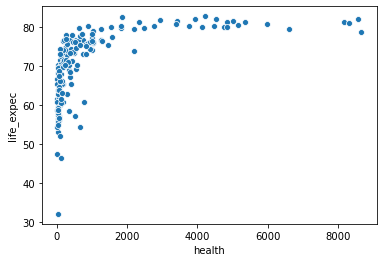

In [71]:
# Distribution of health vs life_expec
sns.scatterplot(x='health',y ='life_expec',data = Country);

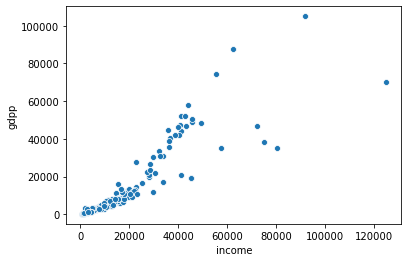

In [72]:
# Distribution of income vs gdpp
sns.scatterplot(x='income',y ='gdpp',data = Country);

- seems income and gdp has a linear relation

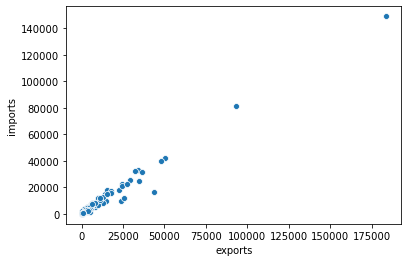

In [73]:
#Distribution of exports vs imports
sns.scatterplot(x='exports',y ='imports',data = Country);

- Import and exports also have a linear relation 

In [74]:
# Correlation between numerical variables
Country.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


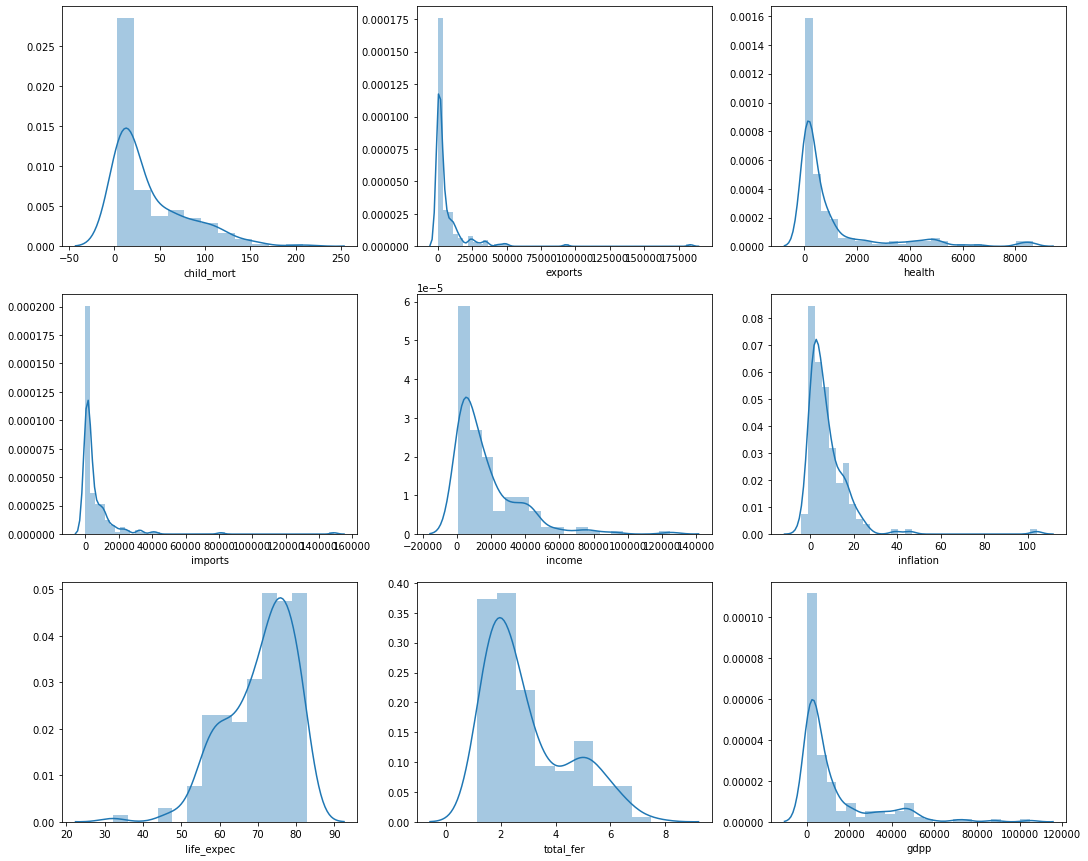

In [75]:
# Check distribution of the values for all the column
plt.figure(figsize=[18,15])
feature = Country.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(Country[i[1]])

### will use income, child_mort and gdpp for cluster profiling 

## Outlier Treatment

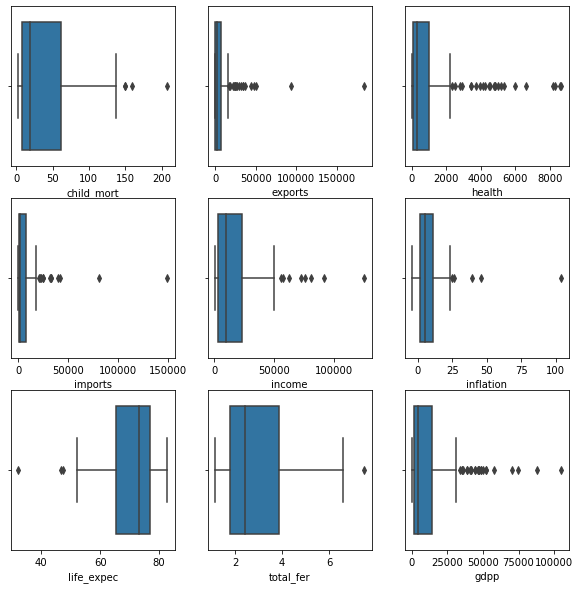

In [76]:
plt.figure(figsize = [10,10])
feature = Country.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(Country[i[1]])

From the above graph we can infer that all the column has outliers so we need to treat the outlier other wise will will impact out custers

- child_mort: outlier's are present at the upper end and we cannot treat it as we may loss some countries that are actually in  the need of AID.
- we can treat all other column with upper end outliers.
- we will not treat the lower end outliers for income, GDPP.

In [77]:
features = ['exports','health','imports','income','inflation','total_fer','gdpp']
for i in features:
    q4 = Country[i].quantile(0.99)
    Country[i][Country[i]>=q4]= q4

In [85]:
#Capping the life_expec column
q1 = Country['life_expec'].quantile(0.01)
q4 = Country['life_expec'].quantile(0.99)
Country['life_expec'][Country['life_expec']<=q1]= q1

In [86]:
Country.shape

(167, 10)

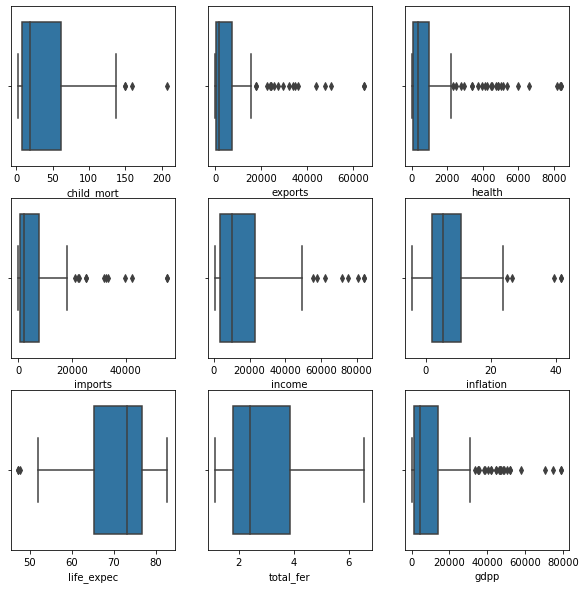

In [87]:
# After performing capping lets check again the boxplot
plt.figure(figsize = [10,10])
feature = Country.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(Country[i[1]])

## Clustering

In [88]:
# Check the hopkins

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [89]:
#Use the Hopkins Statistic function by passing the above dataset as a paramter
hop = []
for i in range(10):
    h = hopkins(Country.drop('country', axis = 1))
    hop.append(h)
hop

[0.8897837669962084,
 0.8794583577922811,
 0.9156429941896448,
 0.9195967627625573,
 0.927857773132268,
 0.9203516536622616,
 0.9003451724436539,
 0.9559468461450624,
 0.9624566691129569,
 0.8917873220792486]

In [90]:
# Average of hopkins value
sum(hop)/len(hop)

0.9163227318316144

- We have checked our data with hopkins function multiple times and get the value around 90. so, we can conclude that our data is good for clustering

## Scaling

In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Country1 = scaler.fit_transform(Country.drop('country', axis = 1))
Country1

array([[4.26484907e-01, 8.36863963e-04, 3.46486075e-03, ...,
        2.53647587e-01, 8.62642234e-01, 4.08334073e-03],
       [6.81596884e-02, 1.76580780e-02, 3.03749355e-02, ...,
        8.17620651e-01, 9.23599823e-02, 4.89366829e-02],
       [1.20253165e-01, 2.64157894e-02, 2.06204954e-02, ...,
        8.23232323e-01, 3.21412738e-01, 5.36287203e-02],
       ...,
       [1.00778968e-01, 1.45404661e-02, 9.14352080e-03, ...,
        7.27833895e-01, 1.47775972e-01, 1.36829958e-02],
       [2.61441091e-01, 6.04883201e-03, 6.55394340e-03, ...,
        5.70707071e-01, 6.50214275e-01, 1.36829958e-02],
       [3.91918208e-01, 8.32067595e-03, 8.71363142e-03, ...,
        1.35802469e-01, 7.85059849e-01, 1.55851732e-02]])

In [92]:
# convert the scaled data into dataframe
Country1 =  pd.DataFrame(Country1, columns= Country.columns[1:])
Country1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.000837,0.003465,0.004473,0.011950,0.298766,0.253648,0.862642,0.004083
1,0.068160,0.017658,0.030375,0.035887,0.111276,0.190422,0.817621,0.092360,0.048937
2,0.120253,0.026416,0.020620,0.025280,0.146732,0.444537,0.823232,0.321413,0.053629
3,0.566699,0.033925,0.010454,0.027338,0.063165,0.582429,0.363075,0.925447,0.041835
4,0.037488,0.085656,0.086078,0.129764,0.220749,0.123665,0.831650,0.181026,0.151781


## K-mean clustering

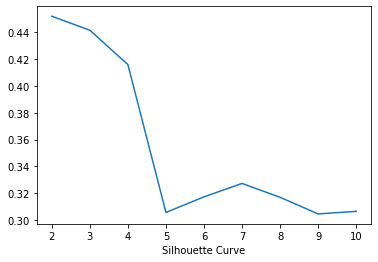

In [93]:
# Choose the value of k
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters= k).fit(Country1)
    ss.append([k, silhouette_score(Country1, kmean.labels_)])
temp = pd.DataFrame(ss)
plt.xlabel('Silhouette Curve')
plt.plot(temp[0], temp[1]);

The highest value of silhouette score is at 2 and then at 3, we can go with 3 k = 3 as we dont want just2 cluster

#### Elbow Curve

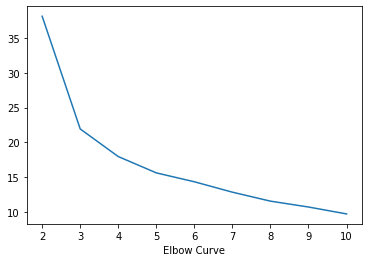

In [94]:
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(Country1)
    ssd.append([k, kmean.inertia_])
temp = pd.DataFrame(ssd)
plt.xlabel('Elbow Curve')
plt.plot(temp[0], temp[1]);

From elbow curve we can see the plot has breakpoint at 3 and 4, so we can go with 3

- We can proceed with k = 3

In [95]:
# k=3
# K-mean clustering

kmean = KMeans(n_clusters= 3, random_state=50)
kmean.fit(Country1)

KMeans(n_clusters=3, random_state=50)

In [96]:
# Check the label ofkMean cluster
kmean.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [97]:
Country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [98]:
Country_kmean = Country.copy()

In [99]:
# Create data frame for cluster label
label = pd.DataFrame(kmean.labels_, columns = ['label'])
label.head()

,label
0,1
1,0
2,0
3,1
4,0


In [100]:
# concate cluster label to the actual data set
Country_kmean = pd.concat([Country_kmean,label], axis =1)
Country_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [101]:
# Number of countries present at each cluster
Country_kmean.label.value_counts()

0    88
1    48
2    31
Name: label, dtype: int64

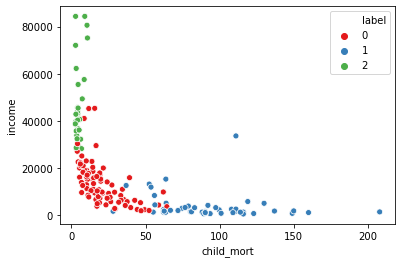

In [102]:
# plot the cluster
sns.scatterplot(x='child_mort',y ='income', hue = 'label', data = Country_kmean, palette='Set1');

From the graph we can see the cluster:
- cluster 0: low income and low child_mort
- cluster 1: high child_mort and low income
- cluster 2: low child_mort and high income

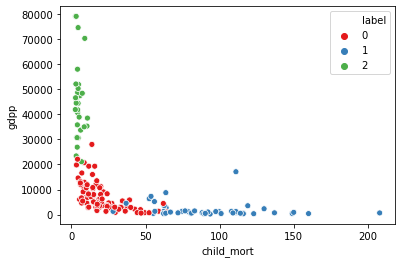

In [103]:
# Plot child_mort and gdpp to see the distribution 
sns.scatterplot(x='child_mort',y ='gdpp', hue = 'label', data = Country_kmean, palette='Set1');

From the graph we can see the cluster:
- cluster 0: low gdp and low child_mort
- cluster 1: low gdp and high child_mort
- cluster 2: high gdp and low child_mort

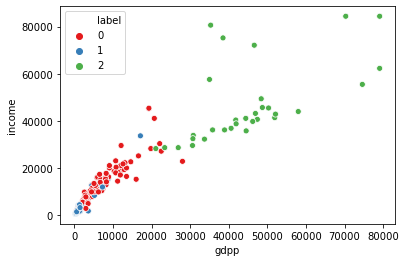

In [104]:
# Plot gpdd and income across all the clusters
sns.scatterplot(x='gdpp',y ='income', hue = 'label', data = Country_kmean, palette='Set1');

From the graph we can see the cluster:
- cluster 0: average gdp and average income
- cluster 1: low gdp and low income
- cluster 2: high gdp and high income 

## Cluster Profiling

In [105]:
# Making sense out of cluster
Country_kmean.drop('country', axis =1).groupby('label').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
label,,,,,,,,,
0,20.918182,3366.778392,482.897845,3461.435467,13455.568182,7.244795,73.222727,2.242159,7332.636364
1,91.610417,879.063521,114.821765,827.028771,3897.354167,10.608604,59.567083,4.972233,1909.208333
2,4.935484,24303.558710,4130.517768,20532.576774,46582.193548,2.769903,80.506452,1.786452,44950.838710


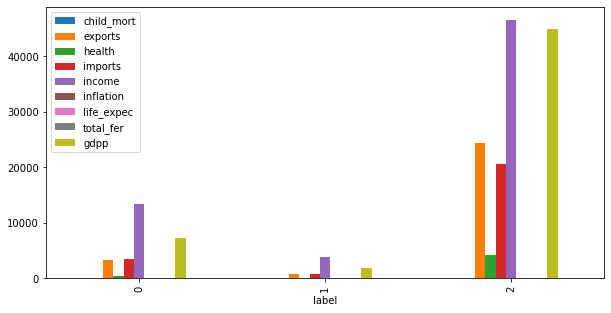

In [106]:
# distribution of different features across all clusters
Country_kmean.drop('country', axis =1).groupby('label').mean().plot(kind = 'bar', figsize=(10,5));

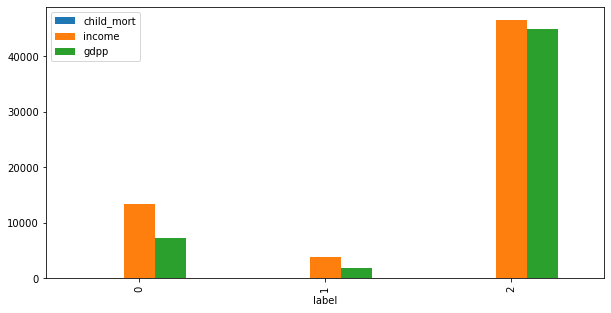

In [107]:
# Distribution of child_mort, income and child_mort across different clusters
Country_kmean.drop(['country','exports','health','imports','inflation','life_expec','total_fer']
                   , axis =1).groupby('label').mean().plot(kind = 'bar', figsize=(10,5));

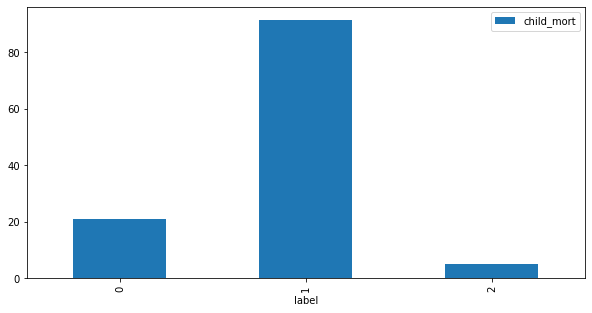

In [108]:
# plot child_mort according to different cluster
Country_kmean[['child_mort','label']].groupby('label').mean().plot(kind = 'bar', figsize=(10,5));

From the above graph and the scatter plot we can infer that 
- cluster 0: - medium value of income, gdp and low child_mort 
- cluster 1: - low income, low gdp and high child_mort
- cluster 2: - high income ,high gdp and low child_mort

So we are interested in finding put the countries which  are actually in the need of AID 
that means country with low income, low gdpp and high child_mort so we will go with cluster 1

In [109]:
# Countries present in cluster 1
Country_kmean[Country_kmean['label']==1].shape

(48, 11)

In [110]:
# Sort the countries based on income, gdpp and chid_mort
Country_kmean[Country_kmean['label']==1].sort_values(by=['income','gdpp','child_mort'], ascending=[True,True,False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,1
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,1
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,1
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,1
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,1


## Hierarchical Clustering

In [111]:
# import libraries for hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Single linkage

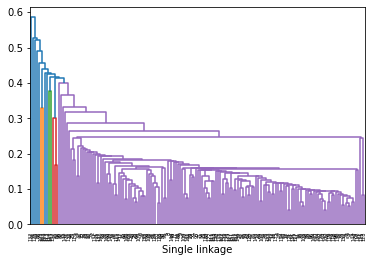

In [112]:
# draw dendrogram using single linkage
mergings = linkage(Country1, method = 'single', metric = 'euclidean')
dendrogram(mergings)
plt.xlabel('Single linkage')
plt.show()

### Complete Linkage

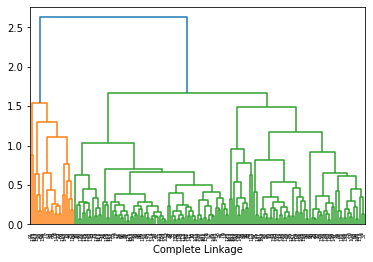

In [113]:
# draw dendrogram using complete linkage
mergings = linkage(Country1, method='complete', metric='euclidean')
dendrogram(mergings)
plt.xlabel('Complete Linkage')
plt.show()

In [114]:
# from the complete linkage process we can choose the value of k as 3

In [115]:
# 3 cluster
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 0, 2, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 2, 1, 2, 1, 1, 0, 0, 1, 0, 0])

In [116]:
# Assign cluster label
Country_kmean['label_hierarchy'] = cluster_labels
Country_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,label_hierarchy
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,1


In [117]:
# number of countries present in different clusters
Country_kmean.label_hierarchy.value_counts()

1    77
0    68
2    22
Name: label_hierarchy, dtype: int64

### Plot the data point to see how it is distributed based on the 3 cluster

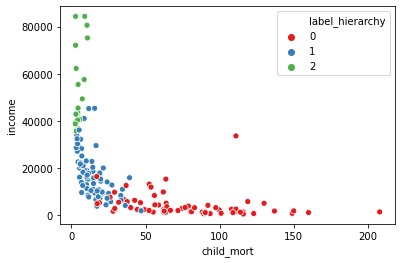

In [118]:
# plot point for child_mort vs income
sns.scatterplot(x='child_mort', y ='income', data = Country_kmean, hue = 'label_hierarchy', palette = 'Set1' );

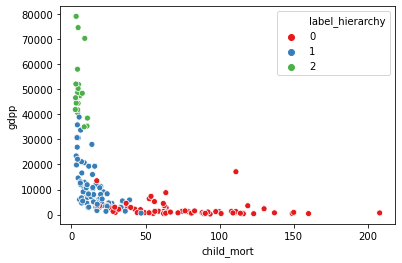

In [119]:
# plot point for child_mort vs gdpp
sns.scatterplot(x='child_mort', y ='gdpp', data = Country_kmean, hue = 'label_hierarchy', palette = 'Set1');

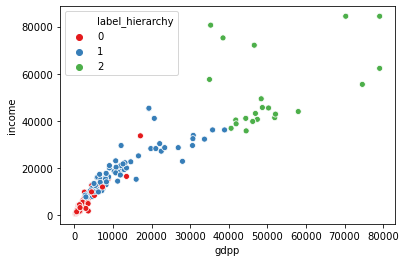

In [120]:
# plot point for gdpp vs income
sns.scatterplot(x='gdpp', y ='income', data = Country_kmean, hue = 'label_hierarchy', palette = 'Set1' );

From the above scatter plot we can infer the below points:
    
   - Cluster 0: These are the data point which denotes high child_mort, low income and low gdpp
   - Cluster 1: These are the data point which denotes low child_mort, income and gdpp lying between low and high.
   - Cluster 2: These are the data point which denotes low child_mort, high income and high gdpp


## Cluster Profiling

In [121]:
# Making sense out of cluster
Country_kmean.drop('country', axis =1).groupby('label_hierarchy').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
label_hierarchy,,,,,,,,,,
0,75.800000,926.881822,126.187104,956.070943,4456.955882,10.249868,62.226765,4.401135,2190.764706,0.705882
1,14.610390,5102.860826,829.756390,5219.760753,17590.779221,6.010896,75.294805,1.980260,11166.779221,0.233766
2,5.077273,28906.073636,4708.206400,23358.144545,52620.363636,3.308727,80.427273,1.800000,50980.727273,2.000000


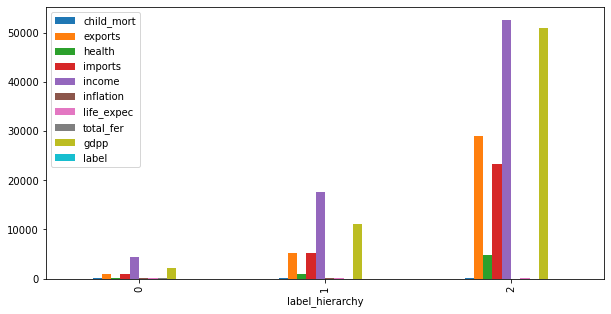

In [122]:
# Plot different features 
Country_kmean.drop('country', axis =1).groupby('label_hierarchy').mean().plot(kind = 'bar', figsize=(10,5));

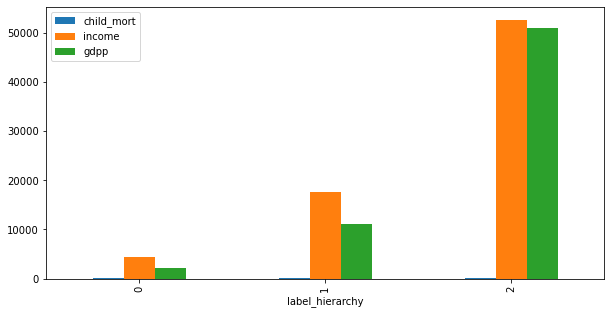

In [123]:
# Distribution of child_mort, income and gdpp across clusters
Country_kmean[['child_mort','income','gdpp','label_hierarchy']].groupby('label_hierarchy').mean().plot(kind = 'bar', 
                                                                                                     figsize=(10,5));

Since the value of child_mort is very less as compare to the income and gdpp we can view its distribution in a seperate plot

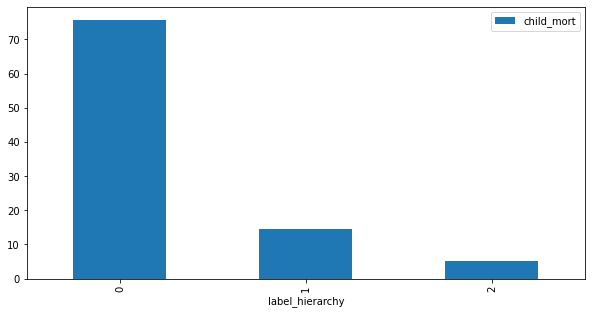

In [124]:
# Distribution of child_mort for different cluster
Country_kmean[['child_mort','label_hierarchy']].groupby('label_hierarchy').mean().plot(kind = 'bar', 
                                                                                        figsize=(10,5));

- We need such data which has high child_mort and low income and low gdpp as such countires are in the urgent need of AID
From the above bar plot and also from the scatter plot which was drawn in the previous steps we I can conclude that we have 
to focus on Cluster 0.

In [125]:
# Check how many data are present in cluster 0
Country_kmean[Country_kmean['label_hierarchy']==0].shape

(68, 12)

In [126]:
# Get the sorted data with cluster 0
Country_kmean[Country_kmean['label_hierarchy']==0].sort_values(by=['income','gdpp','child_mort'], 
                                                               ascending=[True,True,False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,label_hierarchy
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,1,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,1,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,1,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,1,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,1,0


As per conclusion five countries which are in urgent need of AID are:
 - Congo, Dem. Rep
 - Liberia
 - Burundi
 - Niger
 - Central African Republic
    